# Notebook com analise voltada a sars-cov2

#### Arquivos que devem ser importados para fazer analises

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

#### Conexão com o BD

In [2]:
con = sqlite3.connect("../data/propriedades.db")

#### Query para carregar os dados

In [3]:
dataframe = pd.read_sql("select * from dados", con)

#### Comando para mostrar o BD

In [4]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL287510,357.454,1.5119,73.83,10.0,NaN,8.79,1.80,0.40,BASE,357.45,2.0,26.0,0.56,357.2052,5.0,3.0,0.0,CN(C)c1ccccc1C(=O)NCCNCC(O)COc1ccccc1
1,CHEMBL285301,320.433,1.7124,70.59,9.0,NaN,8.79,1.96,0.55,BASE,320.43,2.0,23.0,0.61,320.2100,4.0,3.0,0.0,O=C(NCCNCC(O)COc1ccccc1)C1CCCCC1
2,CHEMBL285413,255.314,1.4123,48.95,8.0,NaN,7.42,1.45,1.14,NEUTRAL,255.31,1.0,18.0,0.71,255.1471,5.0,1.0,0.0,COc1ccc(OC)c(CNCC(OC)OC)c1
3,CHEMBL24475,262.349,3.6489,46.53,8.0,9.95,NaN,4.40,4.40,NEUTRAL,262.35,1.0,19.0,0.57,262.1569,3.0,1.0,0.0,CCCC/C=C/C(=O)CCc1ccc(O)c(OC)c1
4,CHEMBL24545,330.468,4.4500,43.37,2.0,NaN,NaN,4.21,4.21,NEUTRAL,330.47,4.0,24.0,0.70,330.2195,3.0,0.0,0.0,CCC(=O)OC1CCC2C3CCC4=CC(=O)CCC4C3CCC12C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084583,CHEMBL4110107,507.538,4.4727,105.57,8.0,11.72,3.32,3.13,3.13,NEUTRAL,507.54,4.0,35.0,0.47,507.1552,7.0,2.0,1.0,Cc1cc(N=S2(=O)CCC2)cc2ncnc(Nc3ccc(F)cc3O[C@H](...
2084584,CHEMBL4110108,337.335,3.0320,76.68,2.0,11.84,5.74,2.11,2.10,NEUTRAL,337.34,5.0,25.0,0.78,337.1063,5.0,1.0,0.0,O=C1OC[C@H](c2ccc3c(c2)OCCO3)N1c1ccc2nc[nH]c2c1
2084585,CHEMBL4110109,338.785,4.1153,41.99,7.0,NaN,7.09,3.66,3.49,NEUTRAL,338.79,2.0,23.0,0.77,338.0997,3.0,1.0,0.0,CC[C@@H](NCCF)c1ccc(Cl)c(C(=O)c2cccnc2)c1F
2084586,CHEMBL4110110,480.968,3.1266,96.81,10.0,NaN,3.97,3.19,3.19,NEUTRAL,480.97,3.0,33.0,0.54,480.1940,7.0,2.0,0.0,CC(C(=O)NCCF)c1ccc(O[C@@H]2CCN(c3ncnc(OCC(C)(C...


#### Biblioteca com descritores em python e outros modulos

In [2]:
from rdkit import Chem

In [3]:
smiles = '[H]/N=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H]2[C@@H]3[C@@H](C3(C)C)CN2C(=O)[C@H](C(C)(C)C)NC(=O)C(F)(F)F'

In [7]:
pf = Chem.MolFromSmiles(smiles)

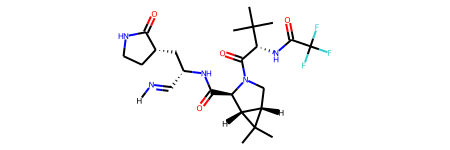

In [11]:
pf

In [8]:
pf_finger = Chem.RDKFingerprint(pf)

#### Busca no BD da molecula 'smiles' a cima

In [9]:
dataframe.query("canonical_smiles == @smiles")

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles


#### Importando modulos desenvolvidos no laboratorio

In [4]:
import sys
sys.path.append("../module/")
from calcula_tanimoto import *

#### Calculando indices de tanimoto

In [ ]:
%%time
data_com_tanimoto = calcula_tanimoto(smiles, dataframe, 20)

Error: CC(F)Cn1cc(Nc2cc(-n3cnc4cc(C#N)cnc43)ncc2C(=O)NC[C@@H](F)C(C)(C)O)cn1

Error: CCOc1cnc(C(=O)Nc2ccc(F)c([C@@]3(C)N=C(N)OCC3(F)F)n2)c(Cl)c1

Error: O=c1[nH]c(N2CCC(c3ccncc3)CC2)nc(N[C@@H]2C[C@H](CO)[C@@H](O)[C@H]2O)c1-c1nc2ccccc2s1

Error: N#CC1(NC(=O)[C@@H]2C[C@@H](Sc3cccc(-c4ccc(F)cc4)c3)CN2C(=O)C2(c3ncc(Cl)cc3F)CC2)CC1

Error: O=c1[nH]c(N2CCOCC2)nc(N[C@@H]2CCCNC2)c1-c1nc2cnccc2s1

Error: O=C(Nc1ccc(OC(F)(F)F)cc1)c1cnc(N2CC[C@@H](O)C2)c(-c2ccoc2)c1

Error: C[C@@H]1CCC[C@H](N2CCC(c3c(F)ccc(Cl)c3F)=CC2=O)c2cc(ccn2)-c2ccc(NC3O[C@H](CO)[C@@H](O)[C@H](O)[C@@H]3N)cc2NC1=O

Error: O=C(Nc1cnc2ccc(N3CCC[C@@H]3c3cc(F)ccc3F)nn12)N1CC2CCC(C1)N2

Error: COC[C@H]1CCCN1c1ccnc(-c2c[nH]c3ccc(-c4nnc(N)o4)cc23)n1

Error: C[C@@H]1CCC[C@H](N2CCC(c3c(F)ccc(Cl)c3F)=CC2=O)c2cc(ccn2)-c2cc3ccc(=O)[nH]c3cc2NC1=O

Error: COc1n[nH]c2cc(NC(=O)N[C@H](C)C3CCCCC3)ncc12

Error: COC[C@H](N)[C@@H](C)Nc1nnc(C(N)=O)c(Nc2cc(-c3ccccc3)c3nn(C)cc3c2)n1

Error: CO[C@]12CC[C@@]3(C[C@@H]1COCc1ccccc1)[C@H]1Cc4ccc(Br)c5c4[C@

RDKit WARNING: [10:33:44] WARNING: not removing hydrogen atom without neighbors
[10:33:44] WARNING: not removing hydrogen atom without neighbors


Error: COc1ccc(-c2[nH]nc3c2C(=O)c2c(NC(=O)CN4CCN(C(N)=O)CC4)cccc2-3)cc1



#### Ordenando os pelo maior

In [ ]:
data_com_tanimoto.sort_values(by='i_tanimoto',ascending=False)

In [5]:
con_2 = sqlite3.connect("ligantes_clauber.db")

In [6]:
ligantes = pd.read_sql("select * from ligantes_clauber", con_2)

In [7]:
ligantes

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability
0,CCCC1NC(=O)C(C(C)C)NC(=O)C(C(C)O)N(C)C(=O)C(C(...,1.18150,131.08,509.357720,0.407688,6,4,0.025474
1,CNC(=O)c1ccc(CCNC(=O)C2CCCN2C(=O)CNC(=O)C2CC2c...,1.10810,127.84,506.252920,0.383918,5,4,0.004862
2,N=C1CC(N2CC(NC(=O)C(Cc3ccc4ccccc4c3)NS(=O)(=O)...,1.39557,131.46,505.178375,0.343820,5,4,0.026046
3,CCNC(=O)CNC(=O)C1(C(F)C2(C)CC2(Cl)Cl)CC(O)CN1C...,0.84950,136.04,497.149569,0.275038,5,4,0.000392
4,CCSC1CC2CNC(=O)N(C(=O)C(Cc3ccccc3)NC(=O)C(NC(N...,2.49660,133.63,517.272276,0.378408,5,4,0.003619
...,...,...,...,...,...,...,...,...
2202,CCC(C)(NCCCNCc1cccc(F)c1)C(=O)NC1C(=O)N2C(C(=O...,1.28510,131.08,503.254397,0.264350,6,4,0.002152
2203,C=CCNC(=O)CC1NC2C(C(=O)N3CCCC3C(=O)NC(CC)CC)CC...,1.33210,110.85,501.331505,0.413059,5,3,0.013842
2204,CCc1c(Cl)ccc(CC(NC(=O)C(N)Cc2c[nH]cn2)C(=O)N2C...,1.48900,133.21,506.220845,0.408699,5,4,0.018219
2205,O=C1CCCN(C(=O)C(=O)NC(Cc2ccccc2)C(O)CNC(=O)c2c...,1.02200,127.84,506.252920,0.417204,5,4,0.005340


In [14]:
%%time
ligantes_com_tanimoto = calcula_tanimoto(smiles, ligantes, 20)

CPU times: user 7.55 s, sys: 495 ms, total: 8.04 s
Wall time: 8.07 s


In [11]:
ligantes_com_tanimoto

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,C=C(C)C1C(=O)N2C(CCC1O)C(=O)C2C(=O)NC(Cc1c[nH]...,1.85300,131.60,508.268570,0.303294,5,4,0.002141,0.45
1,CCN1CCN(C(=O)C(Cc2c[nH]c3ccccc23)NC(=O)C(N)Cc2...,1.94010,131.76,505.268905,0.370028,6,4,0.004460,0.39
2,CC(NC(=O)CNCCCC(=O)O)C(=O)N1CC2c3ccccc3CC2C1C(...,1.41720,127.84,510.284220,0.352686,5,4,0.214548,0.51
3,CN=c1ccc(CC(NC(=O)C(N)CC(C)C)C(=O)NC2CC(=O)N(C...,1.29420,132.68,508.316189,0.364081,5,4,0.044124,0.42
4,CNC(=O)C(CC(=O)O)NC(=O)C(C)NC(=O)C1N(C(=O)Cc2c...,0.85890,144.91,512.183791,0.385961,5,4,0.005586,0.49
...,...,...,...,...,...,...,...,...,...
106,CNC(=O)C(CNC1CC2(C)C(C)CC1C1CCC3(C)C1C23)NC(=O...,1.86490,130.39,502.261377,0.452182,5,4,0.022848,0.39
107,NC(=O)CC(CCc1ccccc1)NC(=O)C1C(F)C(O)CN1C(=O)C(...,1.11260,138.75,504.193961,0.383711,5,4,0.002473,0.44
108,CC(C)CNC(=O)C(NC1CC2C(=O)n3ccc(c32)C1=O)C(C)NC...,1.12470,135.32,497.243833,0.388640,7,4,0.008248,0.39
109,CNC(=O)C(Cc1ccccc1)NC(=O)C1CCCN1C(=O)C(Cc1cccc...,0.91570,133.63,507.284555,0.379482,5,4,0.006088,0.47


In [15]:
ligantes_com_tanimoto.sort_values(by='i_tanimoto')

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
4,CN(C)CCc1cccc(N=c2[nH]c(=Nc3ccc(Br)cc3)[nH]c(=...,1.10650,147.85,506.084805,0.396179,5,4,0.438547,0.20
19,CCN=c1[nH]c(=NCCNS(=O)(=O)c2cccc(C)c2)[nH]c(=N...,1.77402,130.62,505.089556,0.364303,5,4,0.001153,0.21
109,CNS(=O)(=O)CCN=c1[nH]c(=NCc2cccc(Cl)c2F)[nH]c(...,1.52480,130.62,501.096156,0.391028,5,4,0.002275,0.22
79,Cc1cc(CNC(=O)Nc2ccc(C(=O)NCC(F)(F)F)cc2)ccc1Cn...,1.33162,128.97,505.180564,0.361310,5,4,0.001158,0.22
25,CCN(CC)C(=O)c1ccc(N=c2[nH]c(=NCCNC(C)=O)[nH]c(...,1.66370,133.86,496.252207,0.414009,5,4,0.006457,0.23
...,...,...,...,...,...,...,...,...,...
15,CC1CNC(=O)C(C(C)C)CCNC(=O)C(C(C)C)NC(=O)C2CCCN...,1.79790,133.63,507.378455,0.406921,5,4,0.026337,0.63
51,C=CCNC(=O)C1C2CN(C(=O)C(N)C(CC(N)=O)Cc3ccc(F)c...,0.08850,147.62,499.259483,0.300990,5,4,0.041670,0.63
41,CC(C)CC1C(=O)N2CCCC2C(=O)NC(C(C)C)C(=O)NC1CC(C...,1.82830,127.84,508.362471,0.377822,5,4,0.005590,0.63
44,CCC(C)C(NC(=O)C(C)NC(=O)C1CC2CC2(N)C1)C(=O)N1C...,1.58930,133.63,503.347155,0.379166,5,4,0.007446,0.65
